#Initial Analysis :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ms=pd.read_csv("/content/fear_greed_index.csv")
ms.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
ms=ms[['date', 'classification']]

In [6]:
tp=pd.read_csv("/content/historical_data.csv")
tp.head()

/tmp/ipython-input-3047805484.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  tp=pd.read_csv("/content/historical_data.csv")


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
import pandas as pd
tp["Timestamp"] = pd.to_numeric(tp["Timestamp"], errors="coerce")
tp["Timestamp"] = pd.to_datetime(tp["Timestamp"], unit="ms")
tp["Date"] = tp["Timestamp"].dt.date


Merging fear_greed & historical data on Date :

In [8]:
import pandas as pd
ms["date"] = pd.to_datetime(ms["date"]).dt.date
tp["Date"] = pd.to_datetime(tp["Date"]).dt.date

df = pd.merge(ms, tp, left_on="date", right_on="Date", how="inner")


In [9]:
df.head()

,date,classification,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,2024-03-09,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13097,22382.0,2931.37,BUY,20-04-2024 12:28,0.0,Buy,0.0,0xbe658417a7cbb0b2f53e04088d80eb0203d500d4c445...,1.933053e+10,True,7.83369,1.310000e+14,2024-03-09 16:00:00,2024-03-09
1,2024-03-09,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,447.0,58.56,BUY,20-04-2024 12:28,22374.0,Buy,0.0,0xbe658417a7cbb0b2f53e04088d80eb0203d500d4c445...,1.933053e+10,True,0.15644,7.460000e+14,2024-03-09 16:00:00,2024-03-09
2,2024-03-09,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,503.0,65.89,BUY,20-04-2024 12:28,22821.0,Buy,0.0,0xb2429810a9105cffda3304088d80ed01f7005ac59b6f...,1.933053e+10,False,0.05029,1.770000e+14,2024-03-09 16:00:00,2024-03-09
3,2024-03-09,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,39139.0,5127.21,BUY,20-04-2024 12:28,23323.0,Buy,0.0,0x5fdfde429fabc6ea597d04088d80ee016100d15b8dc3...,1.933053e+10,False,3.91389,1.070000e+15,2024-03-09 16:00:00,2024-03-09
4,2024-03-09,Extreme Greed,0x430f09841d65beb3f27765503d0f850b8bce7713,PURR/USDC,0.13100,726.0,95.11,BUY,20-04-2024 12:28,62459.0,Buy,0.0,0xb4b03e0b058a9b9be6ee04088d80ff014300e3fc5f53...,1.933053e+10,False,0.07259,5.870000e+14,2024-03-09 16:00:00,2024-03-09


Keeping relevant columns :

In [10]:
df=df[['classification','Coin','Account','Execution Price','Size Tokens','Size USD','Side','Direction','Start Position','Fee','Closed PnL','Date']]


In [11]:
df.head()

,classification,Coin,Account,Execution Price,Size Tokens,Size USD,Side,Direction,Start Position,Fee,Closed PnL,Date
0,Extreme Greed,PURR/USDC,0x430f09841d65beb3f27765503d0f850b8bce7713,0.13097,22382.0,2931.37,BUY,Buy,0.0,7.83369,0.0,2024-03-09
1,Extreme Greed,PURR/USDC,0x430f09841d65beb3f27765503d0f850b8bce7713,0.13100,447.0,58.56,BUY,Buy,22374.0,0.15644,0.0,2024-03-09
2,Extreme Greed,PURR/USDC,0x430f09841d65beb3f27765503d0f850b8bce7713,0.13100,503.0,65.89,BUY,Buy,22821.0,0.05029,0.0,2024-03-09
3,Extreme Greed,PURR/USDC,0x430f09841d65beb3f27765503d0f850b8bce7713,0.13100,39139.0,5127.21,BUY,Buy,23323.0,3.91389,0.0,2024-03-09
4,Extreme Greed,PURR/USDC,0x430f09841d65beb3f27765503d0f850b8bce7713,0.13100,726.0,95.11,BUY,Buy,62459.0,0.07259,0.0,2024-03-09


Checking for Null values :

In [13]:
df.isnull().sum()

,0
classification,0
Coin,0
Account,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Direction,0
Start Position,0
Fee,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30263 entries, 0 to 30262
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   classification   30263 non-null  object 
 1   Coin             30263 non-null  object 
 2   Account          30263 non-null  object 
 3   Execution Price  30263 non-null  float64
 4   Size Tokens      30263 non-null  float64
 5   Size USD         30263 non-null  float64
 6   Side             30263 non-null  object 
 7   Direction        30263 non-null  object 
 8   Start Position   30263 non-null  float64
 9   Fee              30263 non-null  float64
 10  Closed PnL       30263 non-null  float64
 11  Date             30263 non-null  object 
dtypes: float64(6), object(6)
memory usage: 2.8+ MB


#Performance by sentiment

In [18]:
daily_pnl = df.groupby(['Date', 'Account'])['Closed PnL'].sum().reset_index(name='Daily_Closed_PnL')

In [19]:
mean_pnl_by_classification = df.groupby('classification')['Closed PnL'].mean()
display(mean_pnl_by_classification)

,Closed PnL
classification,
Extreme Greed,46.624155
Fear,154.247648
Greed,13.230233
Neutral,76.452752


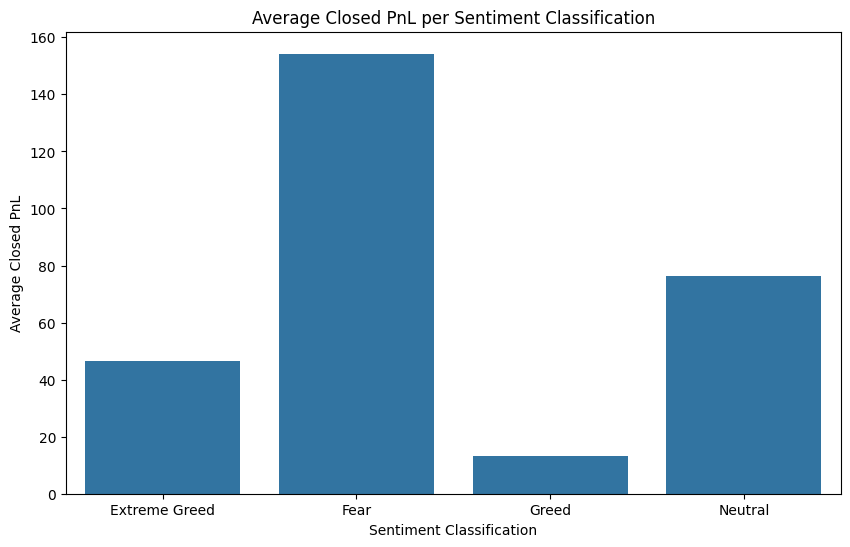

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming avg_pnl_sentiment DataFrame is available from previous steps
plt.figure(figsize=(10, 6))
sns.barplot(x='classification', y='Avg_Closed_PnL', data=avg_pnl_sentiment)
plt.title('Average Closed PnL per Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.show()

**Inference**:

Based on these averages, trades made during 'Fear' and 'Neutral' market sentiments appear to be more profitable on average compared to trades made during 'Extreme Greed' and 'Greed' sentiments.

WinRate (% of profitable trades):

In [20]:
df['Win'] = df['Closed PnL'] > 0
win_rate_sentiment = df.groupby('classification')['Win'].mean().reset_index(name='Win_Rate')

In [21]:
win_rate_sentiment

,classification,Win_Rate
0,Extreme Greed,0.707437
1,Fear,0.481187
2,Greed,0.380049
3,Neutral,0.429668


**Inference**:

Trades made during 'Extreme Greed' sentiment have the highest win rate, meaning a higher percentage of trades are profitable during this period. 'Fear' and 'Neutral' sentiments have moderate win rates, while 'Greed' has the lowest win rate. This suggests that while 'Fear' and 'Neutral' might have higher *average* PnL as seen before, 'Extreme Greed' has a higher *proportion* of winning trades.

#Trade activity by sentiment :

Average trade size per Sentiment Category
-> Indicates trader confidence or risk appetite under different market moods. Larger average trade sizes under Greed may suggest more aggressive trading, while smaller sizes during Fear could reflect caution.

In [66]:
avg_trade_size = df.groupby('classification')['Size USD'].mean().reset_index(name='Avg_Trade_Size_USD')


In [67]:
avg_trade_size

,classification,Avg_Trade_Size_USD
0,Extreme Greed,4100.716743
1,Fear,15499.287889
2,Greed,10964.667781
3,Neutral,8809.184201


The average trade size varies significantly based on sentiment. Trades during periods of 'Fear' have the largest average size, followed by 'Greed', 'Neutral', and finally 'Extreme Greed' with the smallest average trade size.

Average trade size during extreme greed is 4100.72 USD, during fear is 15499.29 USD, during greed is 10964.67 USD, and during neutral is 8809.18 USD.

#Fee vs PnL by sentiment :

In [70]:
df['Fee_Rate'] = df['Fee'] / df['Size USD']
daily_fee_rate = df.groupby('Date')['Fee_Rate'].mean().reset_index(name='Daily_Avg_Fee_Rate')


In [71]:
avg_fee_sentiment = df.groupby('classification')['Fee'].mean().reset_index(name='Average_Fee')

print("\nAverage Fee per Sentiment:")
display(avg_fee_sentiment)


Average Fee per Sentiment:


,classification,Average_Fee
0,Extreme Greed,0.582449
1,Fear,3.046635
2,Greed,3.037615
3,Neutral,3.005454


**Inference: Average Fee per Sentiment**

The average fee per trade is significantly lower during 'Extreme Greed' (approximately 0.58) compared to 'Fear' (approximately 3.05), 'Greed' (approximately 3.04), and 'Neutral' (approximately 3.01). This difference in average fees across sentiments could be influenced by various factors such as:
*   **Trade Size**: If average trade sizes are larger during Fear/Greed/Neutral, even a similar fee rate would result in higher absolute fees. (We saw earlier that average trade size is indeed larger in Fear, Greed, and Neutral than Extreme Greed).
*   **Asset Volatility/Liquidity**: Trading in more volatile or less liquid assets during certain sentiments might incur higher fees.
*   **Platform Fee Structure**: The trading platform might have a dynamic fee structure based on market conditions or trade characteristics.
*   **Trader Behavior**: Traders might be engaging in different types of trades (e.g., market vs. limit orders) during different sentiments, which could have different fee structures.

In [30]:
fear_pnl = df[df['classification'] == 'Fear']['Closed PnL'].mean()
greed_pnl = df[df['classification'] == 'Greed']['Closed PnL'].mean()

print(f"Average Closed PnL on Fear days: {fear_pnl:.2f}")
print(f"Average Closed PnL on Greed days: {greed_pnl:.2f}")

Average Closed PnL on Fear days: 154.25
Average Closed PnL on Greed days: 13.23


**Inference: Average Closed PnL on Fear vs Greed Days**

The output shows that the average Closed PnL on 'Fear' days (154.25) is significantly higher than on 'Greed' days (13.23). This reinforces the earlier finding that trades made during 'Fear' market sentiment tend to be more profitable on average compared to trades made during 'Greed' sentiment.

#Trader level analysis :

In [31]:
import pandas as pd

trader_sentiment_pnl = df.groupby(['Account', 'classification'])['Closed PnL'].sum().reset_index(name='Total_PnL')
df['Win'] = df['Closed PnL'] > 0

trader_sentiment_winrate = df.groupby(['Account', 'classification'])['Win'].mean().reset_index(name='Win_Rate')


trader_performance = pd.merge(trader_sentiment_pnl, trader_sentiment_winrate, on=['Account', 'classification'])

consistent_profitable = trader_performance[
    (trader_performance['Total_PnL'] > 0) & (trader_performance['Win_Rate'] > 0.60)
]

pivot_pnl = trader_performance.pivot(index='Account', columns='classification', values='Total_PnL').fillna(0)
pivot_winrate = trader_performance.pivot(index='Account', columns='classification', values='Win_Rate').fillna(0)

print("Consistently profitable traders by sentiment:\n")
consistent_profitable


Consistently profitable traders by sentiment:



,Account,classification,Total_PnL,Win_Rate
4,0x430f09841d65beb3f27765503d0f850b8bce7713,Greed,160450.518105,0.883721
5,0x430f09841d65beb3f27765503d0f850b8bce7713,Neutral,145563.448374,0.951807
14,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Extreme Greed,187842.084190,0.824071
15,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Fear,116612.748067,0.794890
16,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,37526.331877,0.820866


**Inference: Consistently Profitable Traders by Sentiment**

The output identifies specific trader accounts that have demonstrated consistent profitability (Total PnL > 0 and Win Rate > 60%) within certain market sentiment classifications. This suggests that:
*   Some traders have strategies that are particularly effective during specific market moods (e.g., the account ending in `...bce7713` is consistently profitable in 'Greed' and 'Neutral', while the account ending in `...f1170d4` is consistently profitable in 'Extreme Greed', 'Fear', and 'Greed').

# Relationship between sentiment classification, trade side, trade direction, and PnL :

Sentiment and side with pnl:


In [32]:
crosstab_sentiment_side_pnl_total = pd.crosstab(df['classification'], df['Side'], values=df['Closed PnL'], aggfunc='sum')
crosstab_sentiment_side_pnl_mean = pd.crosstab(df['classification'], df['Side'], values=df['Closed PnL'], aggfunc='mean')

print("Total Closed PnL by Sentiment and Side:")
display(crosstab_sentiment_side_pnl_total)

print("\nAverage Closed PnL by Sentiment and Side:")
display(crosstab_sentiment_side_pnl_mean)

Total Closed PnL by Sentiment and Side:


Side,BUY,SELL
classification,,
Extreme Greed,9.312101e+04,86801.606038
Fear,2.348044e+06,849510.088976
Greed,-2.328543e+05,287230.517165
Neutral,2.065211e+04,98919.999326



Average Closed PnL by Sentiment and Side:


Side,BUY,SELL
classification,,
Extreme Greed,50.227080,43.292572
Fear,225.903758,82.189444
Greed,-115.905554,136.711336
Neutral,29.005766,116.103286


**Inference: PnL by Sentiment and Trade Side**

Analyzing the relationship between sentiment classification and trade side (BUY/SELL) reveals interesting patterns in profitability:

*   **Total Closed PnL**:
    *   'Fear' sentiment with 'BUY' trades generated the highest total PnL.
    *   'Fear' sentiment with 'SELL' trades also contributed significantly to total PnL.
    *   'Greed' sentiment with 'BUY' trades resulted in a negative total PnL, while 'SELL' trades under 'Greed' were profitable in total.
    *   'Extreme Greed' and 'Neutral' sentiments showed positive total PnL for both BUY and SELL sides, but the magnitudes were smaller compared to 'Fear'.

*   **Average Closed PnL**:
    *   'Fear' sentiment with 'BUY' trades had the highest average PnL.
    *   'Fear' sentiment with 'SELL' trades also showed a positive average PnL, though lower than BUY trades in 'Fear'.
    *   'Greed' sentiment with 'BUY' trades had a negative average PnL, while 'SELL' trades under 'Greed' were profitable on average.
    *   'Neutral' sentiment showed a higher average PnL for 'SELL' trades compared to 'BUY' trades.
    *   'Extreme Greed' showed positive average PnL for both sides, with 'BUY' slightly higher than 'SELL'.

These findings suggest that the profitability of BUY versus SELL trades can vary significantly depending on the prevailing market sentiment. 'Fear' seems to be a favorable period for both BUY and SELL trades on average, while 'Greed' appears more favorable for SELL trades.

#Relationship between sentiment classification and trade direction (e.g., Open Long, Close Short), with the values representing the total or average PnL.


In [33]:
crosstab_sentiment_direction_pnl_total = pd.crosstab(df['classification'], df['Direction'], values=df['Closed PnL'], aggfunc='sum')
crosstab_sentiment_direction_pnl_mean = pd.crosstab(df['classification'], df['Direction'], values=df['Closed PnL'], aggfunc='mean')

print("Total Closed PnL by Sentiment and Direction:")
display(crosstab_sentiment_direction_pnl_total)

print("\nAverage Closed PnL by Sentiment and Direction:")
display(crosstab_sentiment_direction_pnl_mean)

Total Closed PnL by Sentiment and Direction:


Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Long > Short,Open Long,Open Short,Sell,Short > Long,Spot Dust Conversion
classification,,,,,,,,,,
Extreme Greed,NaN,0.0,85938.673538,9.138717e+04,862.932500,0.0,0.0,0.000000,1733.838130,NaN
Fear,NaN,0.0,627077.936128,2.365584e+06,2103.533272,0.0,0.0,220328.619576,-17540.315150,NaN
Greed,NaN,0.0,148250.688624,-2.328543e+05,NaN,0.0,0.0,138979.828541,NaN,0.0
Neutral,57478.456026,NaN,41441.543300,2.025833e+04,NaN,0.0,0.0,NaN,393.774202,0.0



Average Closed PnL by Sentiment and Direction:


Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Long > Short,Open Long,Open Short,Sell,Short > Long,Spot Dust Conversion
classification,,,,,,,,,,
Extreme Greed,NaN,0.0,52.723113,73.226898,215.733125,0.0,0.0,0.000000,577.946043,NaN
Fear,NaN,0.0,113.129702,515.939798,350.588879,0.0,0.0,237.167513,-5846.771717,NaN
Greed,NaN,0.0,171.785271,-267.341285,NaN,0.0,0.0,1432.781738,NaN,0.0
Neutral,7184.807003,NaN,70.598881,143.676108,NaN,0.0,0.0,NaN,393.774202,0.0


**Inference: PnL by Sentiment and Trade Direction**

Analyzing the relationship between sentiment classification and trade direction reveals diverse profitability patterns:

*   **Total Closed PnL**:
    *   'Fear' sentiment with 'Close Short' direction resulted in the highest total PnL.
    *   'Fear' sentiment also showed significant total PnL for 'Close Long' and 'Sell' directions.
    *   'Greed' sentiment with 'Close Short' direction resulted in a negative total PnL, while 'Close Long' and 'Sell' directions under 'Greed' were profitable in total.
    *   'Extreme Greed' showed positive total PnL across most directions, with 'Close Short' and 'Close Long' being notable.
    *   'Neutral' sentiment showed positive total PnL for 'Auto-Deleveraging', 'Close Long', and 'Close Short'.

*   **Average Closed PnL**:
    *   'Fear' sentiment with 'Close Short' direction had the highest average PnL.
    *   'Extreme Greed' with 'Short > Long' and 'Fear' with 'Long > Short' also showed high average PnL, although some directions like 'Fear' with 'Short > Long' had a negative average PnL.
    *   'Greed' sentiment with 'Sell' and 'Close Long' had positive average PnL, while 'Close Short' had a negative average PnL.
    *   'Neutral' sentiment showed high average PnL for 'Auto-Deleveraging' and 'Close Short'.

These findings indicate that certain trade directions are more profitable than others depending on the market sentiment. 'Fear' appears to be particularly favorable for closing short positions, while 'Greed' can be detrimental for closing short positions but profitable for closing long positions and selling.

#Relationship between sentiment classification, trade side, and trade direction, with the values representing the total or average PnL.


In [34]:
crosstab_sentiment_side_direction_pnl_total = pd.crosstab([df['classification'], df['Side']], df['Direction'], values=df['Closed PnL'], aggfunc='sum')
print("Total Closed PnL by Sentiment, Side, and Direction:")
display(crosstab_sentiment_side_direction_pnl_total)
crosstab_sentiment_side_direction_pnl_mean = pd.crosstab([df['classification'], df['Side']], df['Direction'], values=df['Closed PnL'], aggfunc='mean')
print("\nAverage Closed PnL by Sentiment, Side, and Direction:")
display(crosstab_sentiment_side_direction_pnl_mean)

Total Closed PnL by Sentiment, Side, and Direction:


Direction            Auto-Deleveraging  Buy     Close Long   Close Short  \
classification Side                                                        
Extreme Greed  BUY                 NaN  0.0            NaN  9.138717e+04   
               SELL                NaN  NaN   85938.673538           NaN   
Fear           BUY                 NaN  0.0            NaN  2.365584e+06   
               SELL                NaN  NaN  627077.936128           NaN   
Greed          BUY                 NaN  0.0            NaN -2.328543e+05   
               SELL                NaN  NaN  148250.688624           NaN   
Neutral        BUY                 NaN  NaN            NaN  2.025833e+04   
               SELL       57478.456026  NaN   41441.543300           NaN   

Direction            Long > Short  Open Long  Open Short           Sell  \
classification Side                                                       
Extreme Greed  BUY            NaN        0.0         NaN            NaN   
               SELL    862.932500        NaN         0.0       0.000000   
Fear           BUY            NaN        0.0         NaN            NaN   
               SELL   2103.533272        NaN         0.0  220328.619576   
Greed          BUY            NaN        0.0         NaN            NaN   
               SELL           NaN        NaN         0.0  138979.828541   
Neutral        BUY            NaN        0.0         NaN            NaN   
               SELL           NaN        NaN         0.0            NaN   

Direction            Short > Long  Spot Dust Conversion  
classification Side                                      
Extreme Greed  BUY    1733.838130                   NaN  
               SELL           NaN                   NaN  
Fear           BUY  -17540.315150                   NaN  
               SELL           NaN                   NaN  
Greed          BUY            NaN                   NaN  
               SELL           NaN                   0.0  
Neutral        BUY     393.774202                   NaN  
               SELL           NaN                   0.0


Average Closed PnL by Sentiment, Side, and Direction:


Direction            Auto-Deleveraging  Buy  Close Long  Close Short  \
classification Side                                                    
Extreme Greed  BUY                 NaN  0.0         NaN    73.226898   
               SELL                NaN  NaN   52.723113          NaN   
Fear           BUY                 NaN  0.0         NaN   515.939798   
               SELL                NaN  NaN  113.129702          NaN   
Greed          BUY                 NaN  0.0         NaN  -267.341285   
               SELL                NaN  NaN  171.785271          NaN   
Neutral        BUY                 NaN  NaN         NaN   143.676108   
               SELL        7184.807003  NaN   70.598881          NaN   

Direction            Long > Short  Open Long  Open Short         Sell  \
classification Side                                                     
Extreme Greed  BUY            NaN        0.0         NaN          NaN   
               SELL    215.733125        NaN         0.0     0.000000   
Fear           BUY            NaN        0.0         NaN          NaN   
               SELL    350.588879        NaN         0.0   237.167513   
Greed          BUY            NaN        0.0         NaN          NaN   
               SELL           NaN        NaN         0.0  1432.781738   
Neutral        BUY            NaN        0.0         NaN          NaN   
               SELL           NaN        NaN         0.0          NaN   

Direction            Short > Long  Spot Dust Conversion  
classification Side                                      
Extreme Greed  BUY     577.946043                   NaN  
               SELL           NaN                   NaN  
Fear           BUY   -5846.771717                   NaN  
               SELL           NaN                   NaN  
Greed          BUY            NaN                   NaN  
               SELL           NaN                   0.0  
Neutral        BUY     393.774202                   NaN  
               SELL           NaN                   0.0

**Inference: PnL by Sentiment, Side, and Direction**

Analyzing the detailed breakdown of PnL by sentiment, trade side (BUY/SELL), and trade direction reveals more granular insights into profitability:

*   **Fear Sentiment**:
    *   'Fear' with 'BUY' and 'Close Short' shows a very high total and average PnL. This suggests that during fearful periods, buying to close short positions is a highly profitable strategy.
    *   'Fear' with 'SELL' and 'Close Long' also shows significant positive total and average PnL. This indicates that selling to close long positions can also be profitable during fear.

*   **Greed Sentiment**:
    *   'Greed' with 'BUY' and 'Close Short' has a large negative total and average PnL. This is a strong indication that buying to close short positions during greedy periods is a losing strategy.
    *   'Greed' with 'SELL' and 'Close Long' shows positive total and average PnL, suggesting that selling to close long positions is more favorable during greed.

*   **Extreme Greed and Neutral Sentiments**:
    *   These sentiments show generally positive, but smaller, total and average PnL across various combinations of side and direction compared to the standout performances in 'Fear' and the negative performance in 'Greed'.

*   **Other Directions**: Directions like 'Auto-Deleveraging', 'Long > Short', 'Short > Long', and 'Spot Dust Conversion' appear less frequent or have more mixed results, likely representing specific or less common trading events.

These findings emphasize the importance of considering the interaction between market sentiment, the trade's side (BUY/SELL), and its specific direction (opening/closing long/short positions) when evaluating profitability and developing trading strategies. Certain combinations are clearly more advantageous or detrimental than others depending on the prevailing market mood.

#Sharpe & Sortino ratio :

In [62]:
import pandas as pd
import numpy as np

sharpe_by_sentiment = df.groupby("classification")["Closed PnL"].apply(
    lambda x: x.mean() / x.std() if x.std() != 0 else np.nan
)

print(sharpe_by_sentiment)


classification
Extreme Greed    0.119572
Fear             0.080289
Greed            0.006232
Neutral          0.059149
Name: Closed PnL, dtype: float64


In [64]:
import numpy as np
import pandas as pd

def sortino_ratio(x, rf=0):
    """Compute Sortino ratio for a series of returns (PnL)."""
    mean_return = x.mean() - rf
    downside = x[x < rf]  # only negative returns
    downside_std = downside.std()
    if downside_std == 0:
        return np.nan
    return mean_return / downside_std

# Apply by sentiment
sortino_by_sentiment = df.groupby("classification")["Closed PnL"].apply(sortino_ratio)
print(sortino_by_sentiment)


classification
Extreme Greed    0.025565
Fear             0.091651
Greed            0.001767
Neutral          0.015963
Name: Closed PnL, dtype: float64


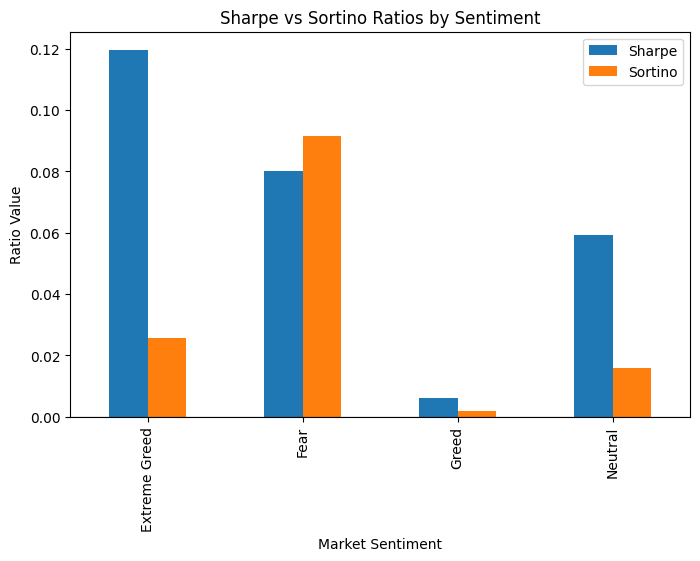

In [65]:
import matplotlib.pyplot as plt

# Assuming you already have sharpe_by_sentiment and sortino_by_sentiment
ratios_df = pd.DataFrame({
    "Sharpe": sharpe_by_sentiment,
    "Sortino": sortino_by_sentiment
})

ratios_df.plot(kind="bar", figsize=(8,5))
plt.title("Sharpe vs Sortino Ratios by Sentiment")
plt.ylabel("Ratio Value")
plt.xlabel("Market Sentiment")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


**Sharpe Ratio** :
Extreme Greed (0.12) → Highest Sharpe → traders earn the best risk-adjusted returns overall. Profits are more consistent relative to volatility.

Fear (0.08) → Still solid → traders manage risk relatively well under fearful conditions.

Neutral (0.06) → Moderate stability, but not as rewarding as Fear or Extreme Greed.

Greed (0.006) → Almost zero → profits here are very volatile, meaning “Greed” trades are more like gambling.

**Sortino Ratios** :
Fear (0.092) → The clear winner when focusing only on downside losses. Traders capture good profits without being punished much by losses.

Extreme Greed (0.026) → Profitable, but a lot of volatility comes from bad losses. Sortino drops much lower compared to Sharpe.

Neutral (0.016) → Somewhat stable but low efficiency.

Greed (0.002) → Essentially useless → any profits are outweighed by frequent or severe losses.

Traders do best in “Fear” markets → lower volatility of losses, more consistent risk-adjusted performance.

Extreme Greed looks good on Sharpe, but Sortino exposes the downside → traders may make money, but they take on big risks and face sharp losses.

Greed is deceptive → even if nominal PnL is positive, risk-adjusted returns are essentially flat.

Neutral sentiment is middle-ground → stable but not very rewarding.


#Logistic Regression :

##Preprocessing :
###Selecting relevant features, handling categorical variables, and ensuring the target variable ('Win') is in the correct format.


In [38]:
model_df = df[['classification', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Direction', 'Start Position', 'Fee', 'Win', 'Date']].copy()
model_df['Date'] = pd.to_datetime(model_df['Date'])
model_df = model_df.drop('Date', axis=1)

In [39]:
model_df['classification'] = model_df['classification'].astype('category')
model_df['Side'] = model_df['Side'].astype('category')
model_df['Direction'] = model_df['Direction'].astype('category')
model_df['Win'] = model_df['Win'].astype(int)

In [40]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Fee']
scaler = StandardScaler()
model_df[numerical_features] = scaler.fit_transform(model_df[numerical_features])

display(model_df.head())

,classification,Execution Price,Size Tokens,Size USD,Side,Direction,Start Position,Fee,Win
0,Extreme Greed,-0.710404,0.019758,-0.179055,BUY,Buy,-0.002149,0.530058,0
1,Extreme Greed,-0.710404,-0.077354,-0.229719,BUY,Buy,0.027224,-0.267138,0
2,Extreme Greed,-0.710404,-0.077106,-0.229590,BUY,Buy,0.027811,-0.278160,0
3,Extreme Greed,-0.710404,0.093945,-0.140329,BUY,Buy,0.028470,0.123031,0
4,Extreme Greed,-0.710404,-0.076119,-0.229075,BUY,Buy,0.079850,-0.275845,0


In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_features = ['Execution Price', 'Size Tokens', 'Size USD', 'Start Position', 'Fee']
X = model_df[numerical_features]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF for numerical features:")
display(vif_data)
high_vif_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()

if high_vif_features:
    print("\nFeatures with high VIF (above 10):")
    print(high_vif_features)
    if 'Size USD' in high_vif_features:
        print("Removing 'Size USD' due to high VIF.")
        model_df = model_df.drop('Size USD', axis=1)
        numerical_features.remove('Size USD')

        X = model_df[numerical_features]
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        print("\nUpdated VIF for numerical features:")
        display(vif_data)

print("\nUpdated model_df head:")
display(model_df.head())

VIF for numerical features:


,feature,VIF
0,Execution Price,1.078501
1,Size Tokens,1.004030
2,Size USD,1.861680
3,Start Position,1.000033
4,Fee,1.937220



Updated model_df head:


,classification,Execution Price,Size Tokens,Size USD,Side,Direction,Start Position,Fee,Win
0,Extreme Greed,-0.710404,0.019758,-0.179055,BUY,Buy,-0.002149,0.530058,0
1,Extreme Greed,-0.710404,-0.077354,-0.229719,BUY,Buy,0.027224,-0.267138,0
2,Extreme Greed,-0.710404,-0.077106,-0.229590,BUY,Buy,0.027811,-0.278160,0
3,Extreme Greed,-0.710404,0.093945,-0.140329,BUY,Buy,0.028470,0.123031,0
4,Extreme Greed,-0.710404,-0.076119,-0.229075,BUY,Buy,0.079850,-0.275845,0


In [42]:
from sklearn.model_selection import train_test_split

X = model_df.drop('Win', axis=1)
y = model_df['Win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nTesting set shapes:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set shapes:
X_train: (24210, 8)
y_train: (24210,)

Testing set shapes:
X_test: (6053, 8)
y_test: (6053,)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['classification', 'Side', 'Direction']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough')

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['classification', 'Side',
                                                   'Direction'])])),
                ('classifier', LogisticRegression())])

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9473
Precision: 0.9042
Recall: 0.9983
F1-Score: 0.9489

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      3084
           1       0.90      1.00      0.95      2969

    accuracy                           0.95      6053
   macro avg       0.95      0.95      0.95      6053
weighted avg       0.95      0.95      0.95      6053



#RandomForest :

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['classification', 'Side', 'Direction']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough')

model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

model_rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['classification', 'Side',
                                                   'Direction'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9835
Random Forest Precision: 0.9696
Random Forest Recall: 0.9976
Random Forest F1-Score: 0.9834

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3084
           1       0.97      1.00      0.98      2969

    accuracy                           0.98      6053
   macro avg       0.98      0.98      0.98      6053
weighted avg       0.98      0.98      0.98      6053



Feature importance for RandomForest :

                                   Feature  Importance
12            onehot__Direction_Open Short    0.144795
8             onehot__Direction_Close Long    0.137728
19               remainder__Start Position    0.137219
9            onehot__Direction_Close Short    0.124616
11             onehot__Direction_Open Long    0.115077
16              remainder__Execution Price    0.104112
5                        onehot__Side_SELL    0.043951
17                  remainder__Size Tokens    0.039818
4                         onehot__Side_BUY    0.035572
20                          remainder__Fee    0.029491
7                    onehot__Direction_Buy    0.028981
18                     remainder__Size USD    0.027216
13                  onehot__Direction_Sell    0.018367
2             onehot__classification_Greed    0.004740
1              onehot__classification_Fear    0.003304
0     onehot__classification_Extreme Greed    0.002706
3           onehot__classification_Neutral    0.000994
15  onehot

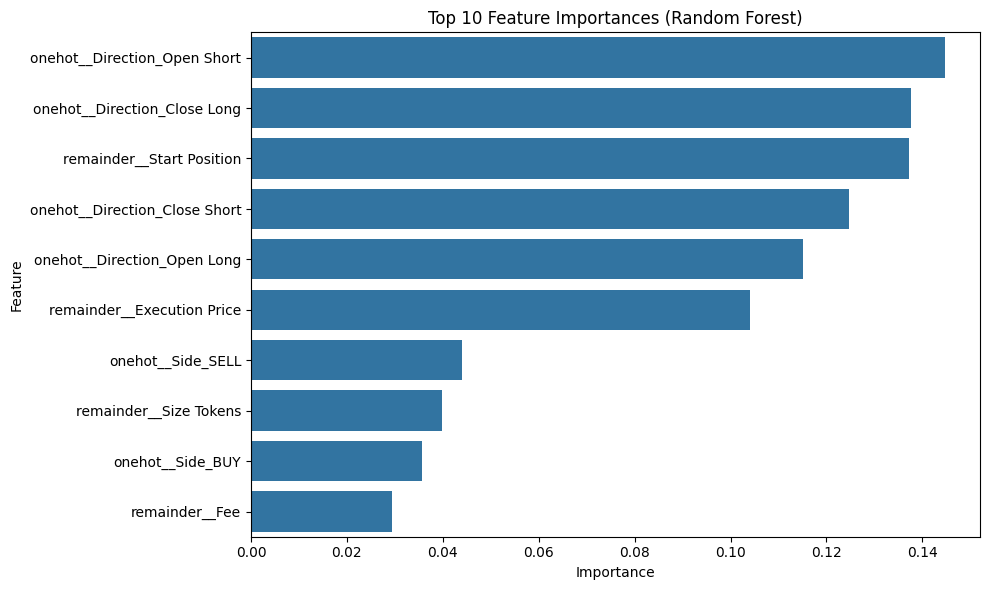

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Access the RandomForestClassifier from the pipeline
rf_classifier = model_rf.named_steps['classifier']

# Get feature importances from the RandomForestClassifier
importances = rf_classifier.feature_importances_

# Get feature names after one-hot encoding
feature_names = model_rf.named_steps['preprocessor'].get_feature_names_out()

# Put into DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

# Optional: Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(10)) # Display top 10 features
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#XgBoost :

In [52]:
!pip install xgboost

In [54]:
from xgboost import XGBClassifier

model_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', XGBClassifier(random_state=42))])

model_xgb.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['classification', 'Side',
                                                   'Direction'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_round...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1-Score: {f1_xgb:.4f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9873
XGBoost Precision: 0.9782
XGBoost Recall: 0.9963
XGBoost F1-Score: 0.9872

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3084
           1       0.98      1.00      0.99      2969

    accuracy                           0.99      6053
   macro avg       0.99      0.99      0.99      6053
weighted avg       0.99      0.99      0.99      6053



## Comparing models

In [56]:
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_xgb],
    'Precision': [precision, precision_rf, precision_xgb],
    'Recall': [recall, recall_rf, recall_xgb],
    'F1-Score': [f1, f1_rf, f1_xgb]
})

print("Model Performance Comparison:")
display(performance_comparison)

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.947299,0.904210,0.998316,0.948935
1,Random Forest,0.983479,0.969558,0.997642,0.983400
2,XGBoost,0.987279,0.978175,0.996295,0.987152


## Summary:

### Data Analysis Key Findings

*   The XGBoost model achieved an accuracy of approximately 98.73\% on the test set.
*   The model demonstrated high precision (0.9782) and recall (0.9963) for predicting profitable trades (class 1).
*   The F1-score for profitable trades was 0.9872.
*   When compared to Logistic Regression and Random Forest models, XGBoost showed the highest Accuracy and F1-Score, along with competitive Precision and Recall.
*   Given the high performance, investigate the feature importance from the XGBoost model to understand which features are most predictive of profitable trades.
*   Consider implementing cross-validation to ensure the model's performance is robust and not overly dependent on the specific train-test split.


Feature Importance for  XGBoost :

XGBoost Feature Importances:


,Feature,Importance
9,onehot__Direction_Close Short,0.398240
8,onehot__Direction_Close Long,0.243212
13,onehot__Direction_Sell,0.210318
12,onehot__Direction_Open Short,0.051515
11,onehot__Direction_Open Long,0.039928
7,onehot__Direction_Buy,0.023328
6,onehot__Direction_Auto-Deleveraging,0.005918
10,onehot__Direction_Long > Short,0.004203
4,onehot__Side_BUY,0.004099
2,onehot__classification_Greed,0.003645


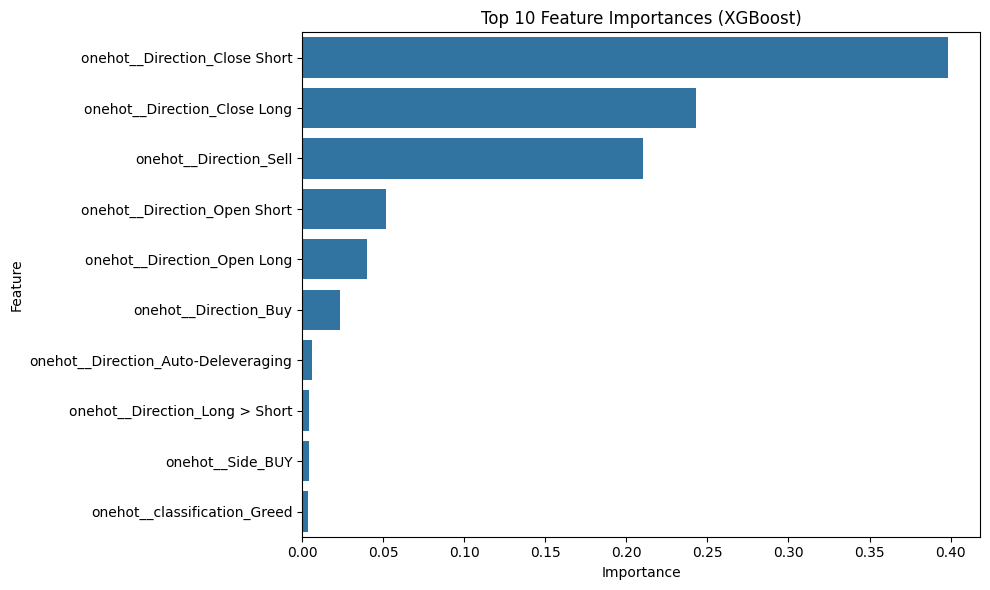

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

xgb_classifier = model_xgb.named_steps['classifier']
importances_xgb = xgb_classifier.feature_importances_

feature_names_xgb = model_xgb.named_steps['preprocessor'].get_feature_names_out()

feat_imp_xgb = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)

print("XGBoost Feature Importances:")
display(feat_imp_xgb)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_xgb.head(10)) # Display top 10 features
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()